In [5]:
library(tidyverse)
library(repr)
# update.packages("https://cran.r-project.org/src/contrib/cli_3.6.1.tar.gz")
# remotes::install_github("tidymodels/tidymodels")
library(tidymodels)
library(randomForest)
install.packages("kknn")
# install.packages("tidymodels")
options(repr.matrix.max.rows = 6)

also installing the dependency ‘igraph’


Warning message in install.packages("kknn"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("kknn"):
“installation of package ‘kknn’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



R Information

Help files with alias or concept or title matching ‘kknn’ using regular
expression matching:


parsnip::details_nearest_neighbor_kknn
                        K-nearest neighbors via kknn
  Aliases: details_nearest_neighbor_kknn
parsnip::multi_predict
                        Model predictions across many sub-models
  Aliases: multi_predict._train.kknn


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




In [2]:
pls_work <- read_csv("t-sne.csv")
# pls_work
set.seed(42)

Rows: 142 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): email, dominant, used
dbl (2): tsne1, tsne2
lgl (1): pd

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
pd_split <- initial_split(pls_work, prop = 0.75, strata = pd)
pd_train <- training(pd_split)
pd_test <- testing(pd_split)

pd_vfold <- vfold_cv(pd_train, v = 5, strata = pd)

ERROR: Error in initial_split(pls_work, prop = 0.75, strata = pd): could not find function "initial_split"


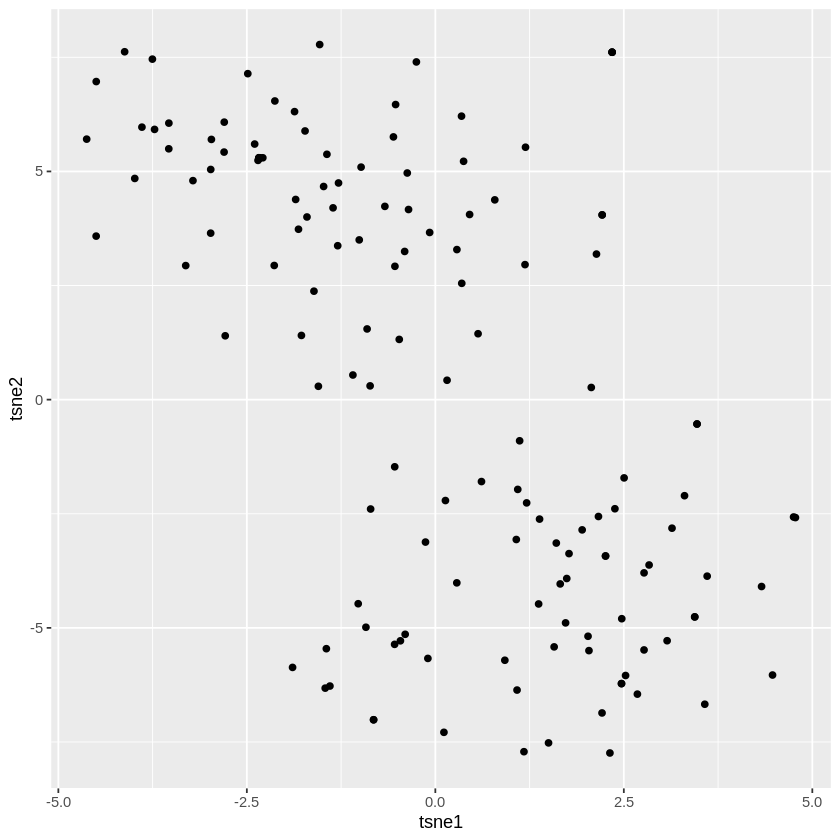

In [22]:
ggplot(pls_work, aes(x = tsne1, y = tsne2)) +
    geom_point()

In [24]:
pd_recipe <- recipe(pd ~ tsne1 + tsne2 + dominant + used, data = pls_work) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

knn_tune <- nearest_neighbor(weight_funct = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

gridvals <- tibble(neighbors = seq(1, 100))

knn_results <- workflow() |>
    add_recipe(pd_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = pd_vfold, grid = gridvals)

ERROR: Error in step_scale(step_center(recipe(pd ~ tsne1 + tsne2 + dominant + : could not find function "step_scale"


In [ ]:
# predictions code
pd_test_predictions <- predict(knn_results, pd_test) |>
    bind_cols(pd_test)